# Portfolio Manager 
by [justfaked](https://github.com/justfaked)

## Summary
This Notebook contains a small tool to visualize a portfolio.
In the code section, individual data types are defined.
The first few cells contain Enums which can be extended at will to add different kinds of investments or change existing categories.


## Update History

### 1.0.1
    - Clear variables after plotting 
    - Prettify enums for nicer plots
    - Add description in MD

### 1.0.0
    - Initial Release

## Code

In [1]:
# Imports
from enum import Enum
from unicodedata import name
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Investment Types
# Add new categories here
class Type(Enum):
    NONE = 0
    STOCK = 1
    BOND = 2
    RESOURCE = 3
    CRYPTO = 4
    SAVINGS = 5

In [3]:
# Asset Strategies
# Add new categories here
class Strategy(Enum):
    NONE = 0
    DIVERSIFY = 1
    VALUE = 2
    GROWTH = 3
    DIVIDEND = 4

In [4]:
# Asset Regions
# Add new categories here
class Region(Enum):
    NONE = 0
    WORLD = 1
    EUROPE = 2
    ASIA_PACIFIC = 3
    NORTH_AMERICA = 4
    SOUTH_AMERICA = 5

In [5]:
# Areas of investments
# Add new categories here

class Sector(Enum):
    NONE = 0
    DIVERSE = 1
    TECH = 2
    CASH_AND_FUNDING = 3
    FINANCE = 4
    RESOURCES_AND_MATERIALS = 5
    UTILITY = 6
    REAL_ESTATE = 7
    INDUSTRY = 8
    CONSUMER_GOODS = 9
    TELECOM = 10
    FOOD = 11
    ENERGY_AND_WATER = 12
    HEALTH = 13

In [6]:
# Investment Class

class Investment:
    name = ""
    investment_type = Type.NONE
    investment_value = 0
    isin = ""
    strategy = Strategy .NONE   
    region = Region.WORLD
    sector = {
        Sector.NONE: 1
    }

    def __init__(self, name, investment_type, investment_value, isin, strategy, region, sector) -> None:
        self.name = name
        self.investment_type = investment_type
        self.investment_value = investment_value
        self.isin = isin
        self.strategy = strategy
        self.region = region
        self.sector = sector

    def get_values_by_sector(self): 
        values = {}
        for key in self.sector:
            values[key] = self.sector[key] * 0.01 * self.investment_value
        return values


In [7]:
# Portfolio Class

class Portfolio:
    investments = {}
    total_value = 0
    value_by_type = {}
    value_by_strategy = {}
    value_by_region = {}
    value_by_sector = {}
    value_share_by_name = {}

    def __init__(self) -> None:
        pass

    def __init__(self, investments) -> None:
        for investment in investments:
            self.add_investments(investment)

    def add_investments(self, investment):
        self.investments[investment.isin] = investment
        self.total_value += investment.investment_value

        if self.value_by_type.__contains__(investment.investment_type):
            self.value_by_type[investment.investment_type] += investment.investment_value
        else:
            self.value_by_type[investment.investment_type] = investment.investment_value

        if self.value_by_strategy.__contains__(investment.strategy):
            self.value_by_strategy[investment.strategy] += investment.investment_value
        else:
            self.value_by_strategy[investment.strategy] = investment.investment_value

        if self.value_by_region.__contains__(investment.region):
            self.value_by_region[investment.region] += investment.investment_value
        else:
            self.value_by_region[investment.region] = investment.investment_value


        values_by_sector = investment.get_values_by_sector()
        for key in values_by_sector:
            if self.value_by_sector.__contains__(key):
                self.value_by_sector[key] += values_by_sector[key]
            else:
                self.value_by_sector[key] = values_by_sector[key]

        self.value_share_by_name[investment.name] = investment.investment_value

    def get_labels_and_sizes(self, collection, contains_enums = True):
        lables = []
        sizes = []
        for key in collection:
            # Filter NONE-Values
            if str(key).__contains__(".NONE"):
                continue
            sizes.append(collection[key])

            # Prettify Enums for plotting
            if contains_enums:
                key = str(key).split('.')[1]
                key = key.replace('_', " ")

            lables.append(key)

        return lables, sizes

    def create_plots(self, collection, title, contains_enums = True):
        lables, sizes = self.get_labels_and_sizes(collection, contains_enums)
        fig, ax = plt.subplots()
        ax.pie(sizes, labels=lables, autopct='%1.1f%%')
        ax.set_title(title)
        ax.axis('equal')


    def visualize(self):
        self.create_plots(self.value_share_by_name, "Investments by Individual Position", contains_enums = False)
        self.create_plots(self.value_by_sector, "Investments by Sector")
        self.create_plots(self.value_by_strategy, "Investments by Investment Strategy")
        self.create_plots(self.value_by_region, "Investments by Region")
        self.create_plots(self.value_by_type, "Investments by Type")    

        plt.show()

# Add individual investments in the cell below this one.

In [8]:
# Add Investments in this list
# The expected pattern is as follows: Investment(<Name>, <InvestmentType>, <ValueInEuro>, <ISIN>, <InvestmentStrategy>, <Region>, {<Sector>: <Percentage>})

    #Investment("ExampleInvestment", Type.NONE, 0, "ISIN", Strategy.NONE, Region.NONE, 
    #       {
    #           Sector.TECH: 50,
    #           Sector.FOOD: 25,
    #           Sector.HEALTH: 25
    #       })

investments = [
    Investment("Example AG", Type.STOCK, 10, "DE0007236101", Strategy.VALUE, Region.EUROPE, 
                {
                    Sector.DIVERSE: 100
                }),

    Investment("STOXX Global Example DIVIDEND ETF", Type.STOCK, 15, "DE000A0F5UH1", Strategy.DIVIDEND, Region.WORLD, 
                {
                    Sector.FINANCE: 33.78,
                    Sector.RESOURCES_AND_MATERIALS: 14.62,
                    Sector.UTILITY: 12.55,
                    Sector.REAL_ESTATE: 10.19,
                    Sector.INDUSTRY: 6.71,
                    Sector.CONSUMER_GOODS: 6.45,
                    Sector.TELECOM: 4.7,
                    Sector.FOOD: 4.07,
                    Sector.HEALTH: 3.25,
                    Sector.TECH: 1.86,
                    Sector.ENERGY_AND_WATER: 1,
                    Sector.CASH_AND_FUNDING: 0.83
                })
]

=============================================================================
# Plotting

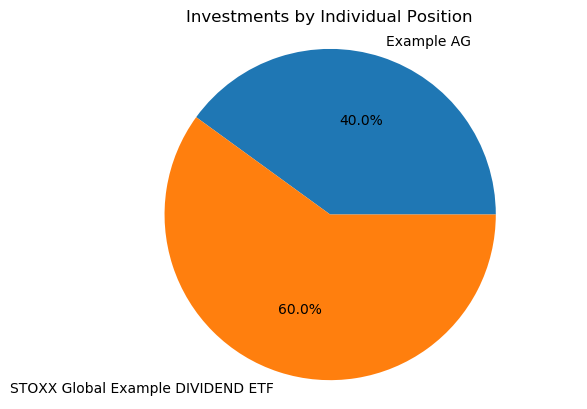

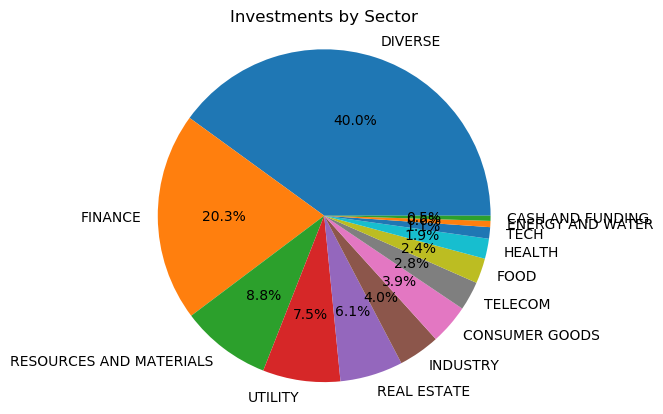

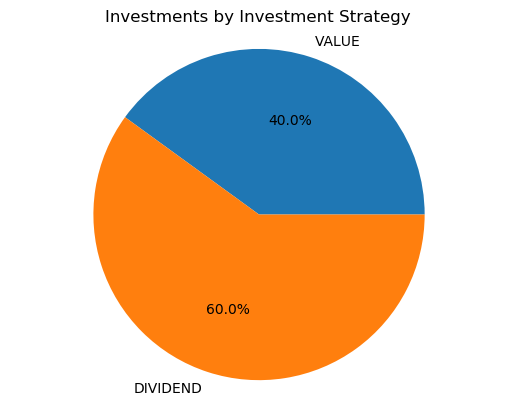

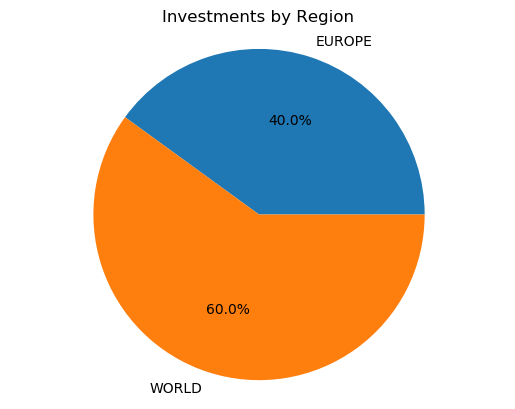

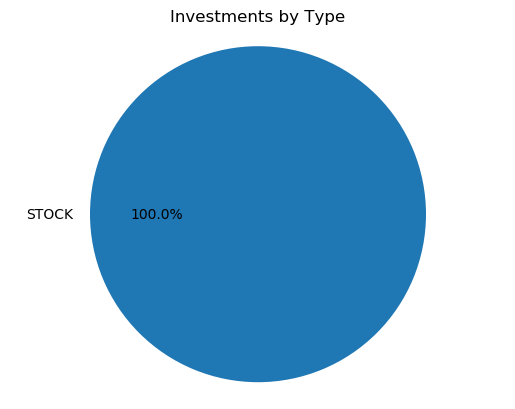

In [9]:
# Initialize portfolio and call visualize function
portfolio = Portfolio(investments)
portfolio.visualize()
del portfolio, investments